#Exploratory Data Analysis (EDA) on Fraud Transactions


## Objective:
Perform exploratory data analysis (EDA) using a real-world fraud dataset to uncover insights, spot anomalies, and build intuition about fraud patterns.

## 📁 Dataset: [Credit Card Fraud Detection Dataset (Kaggle)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

- Transactions made by European cardholders in September 2013
- Features are PCA-transformed (`V1`–`V28`) plus `Time`, `Amount`, and `Class`
- `Class = 1` indicates a fraudulent transaction



**Dataset Loading & Head Output**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")
print(df.head())

# Summary statistics
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Class Distribution (Imbalance)**

In [ ]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


**Insight:** Non-fraudulent transactions (Class 0): 284,315

Fraudulent transactions (Class 1): 492

Fraud rate: ≈ 0.17%

👉 The dataset is highly imbalanced — fraud is extremely rare compared to non-fraud.

**Null Values & Dtypes**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Insight:** There are no null values and all the numerical columns have appropriate dtypes.

**Transaction Median Amounts**

In [ ]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Median amounts
median_fraud = fraud['Amount'].median()
median_non_fraud = non_fraud['Amount'].median()

print(f"Median fraud amount: ${median_fraud:.2f}")
print(f"Median non-fraud amount: ${median_non_fraud:.2f}")

Median fraud amount: $9.25
Median non-fraud amount: $22.00


**Insight:** Frauds tend to have smaller transaction amounts than non-frauds.

Median fraud amount ≈ $9.

Median non-fraud amount ≈ $22.

Max amounts overlap, but most frauds cluster at the lower end.

👉 Fraudulent transactions are often low-value, likely to avoid triggering immediate suspicion.

**(Opt) Plot fraud rate over time using Time column**

hour_of_day
0     0.077973
1     0.236967
2     1.712740
3     0.486827
4     1.041195
5     0.367893
6     0.219459
7     0.317548
8     0.087583
9     0.101023
10    0.048199
11    0.314428
12    0.110246
13    0.110641
14    0.138805
15    0.157949
16    0.133714
17    0.179389
18    0.193673
19    0.121414
20    0.107424
21    0.090380
22    0.058286
23    0.191991
Name: count, dtype: float64


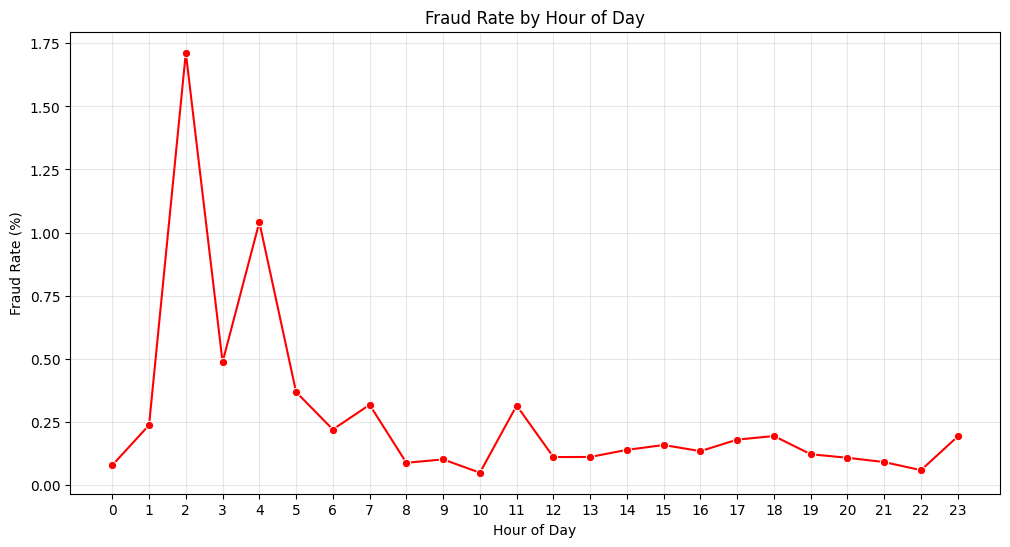

In [ ]:
# Derive hour of day
df['hour_of_day'] = ((df['Time'] // 3600) % 24).astype(int)

# Total transactions per hour
total_counts = df['hour_of_day'].value_counts().sort_index()

# Fraud transactions per hour
fraud_counts = df[df['Class'] == 1]['hour_of_day'].value_counts().sort_index()

# Fraud rate per hour (%)
fraud_rate = (fraud_counts / total_counts * 100).fillna(0)

# Print fraud rates by hour
print(fraud_rate)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=fraud_rate.index, y=fraud_rate.values, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Hour of Day")
plt.xticks(range(0,24))
plt.grid(True, alpha=0.3)
plt.show()

**Insight:** Fraudulent transactions are not evenly distributed across time:

They cluster at certain hours of the day (e.g., late night / early morning).

Non-fraud transactions occur steadily throughout the day.

👉 Fraudsters may exploit specific hours when monitoring is weaker.

**(Opt) PCA Features (V1–V28) using KDE Plot**

(features are anonymized due to confidentiality, but patterns still exist.)

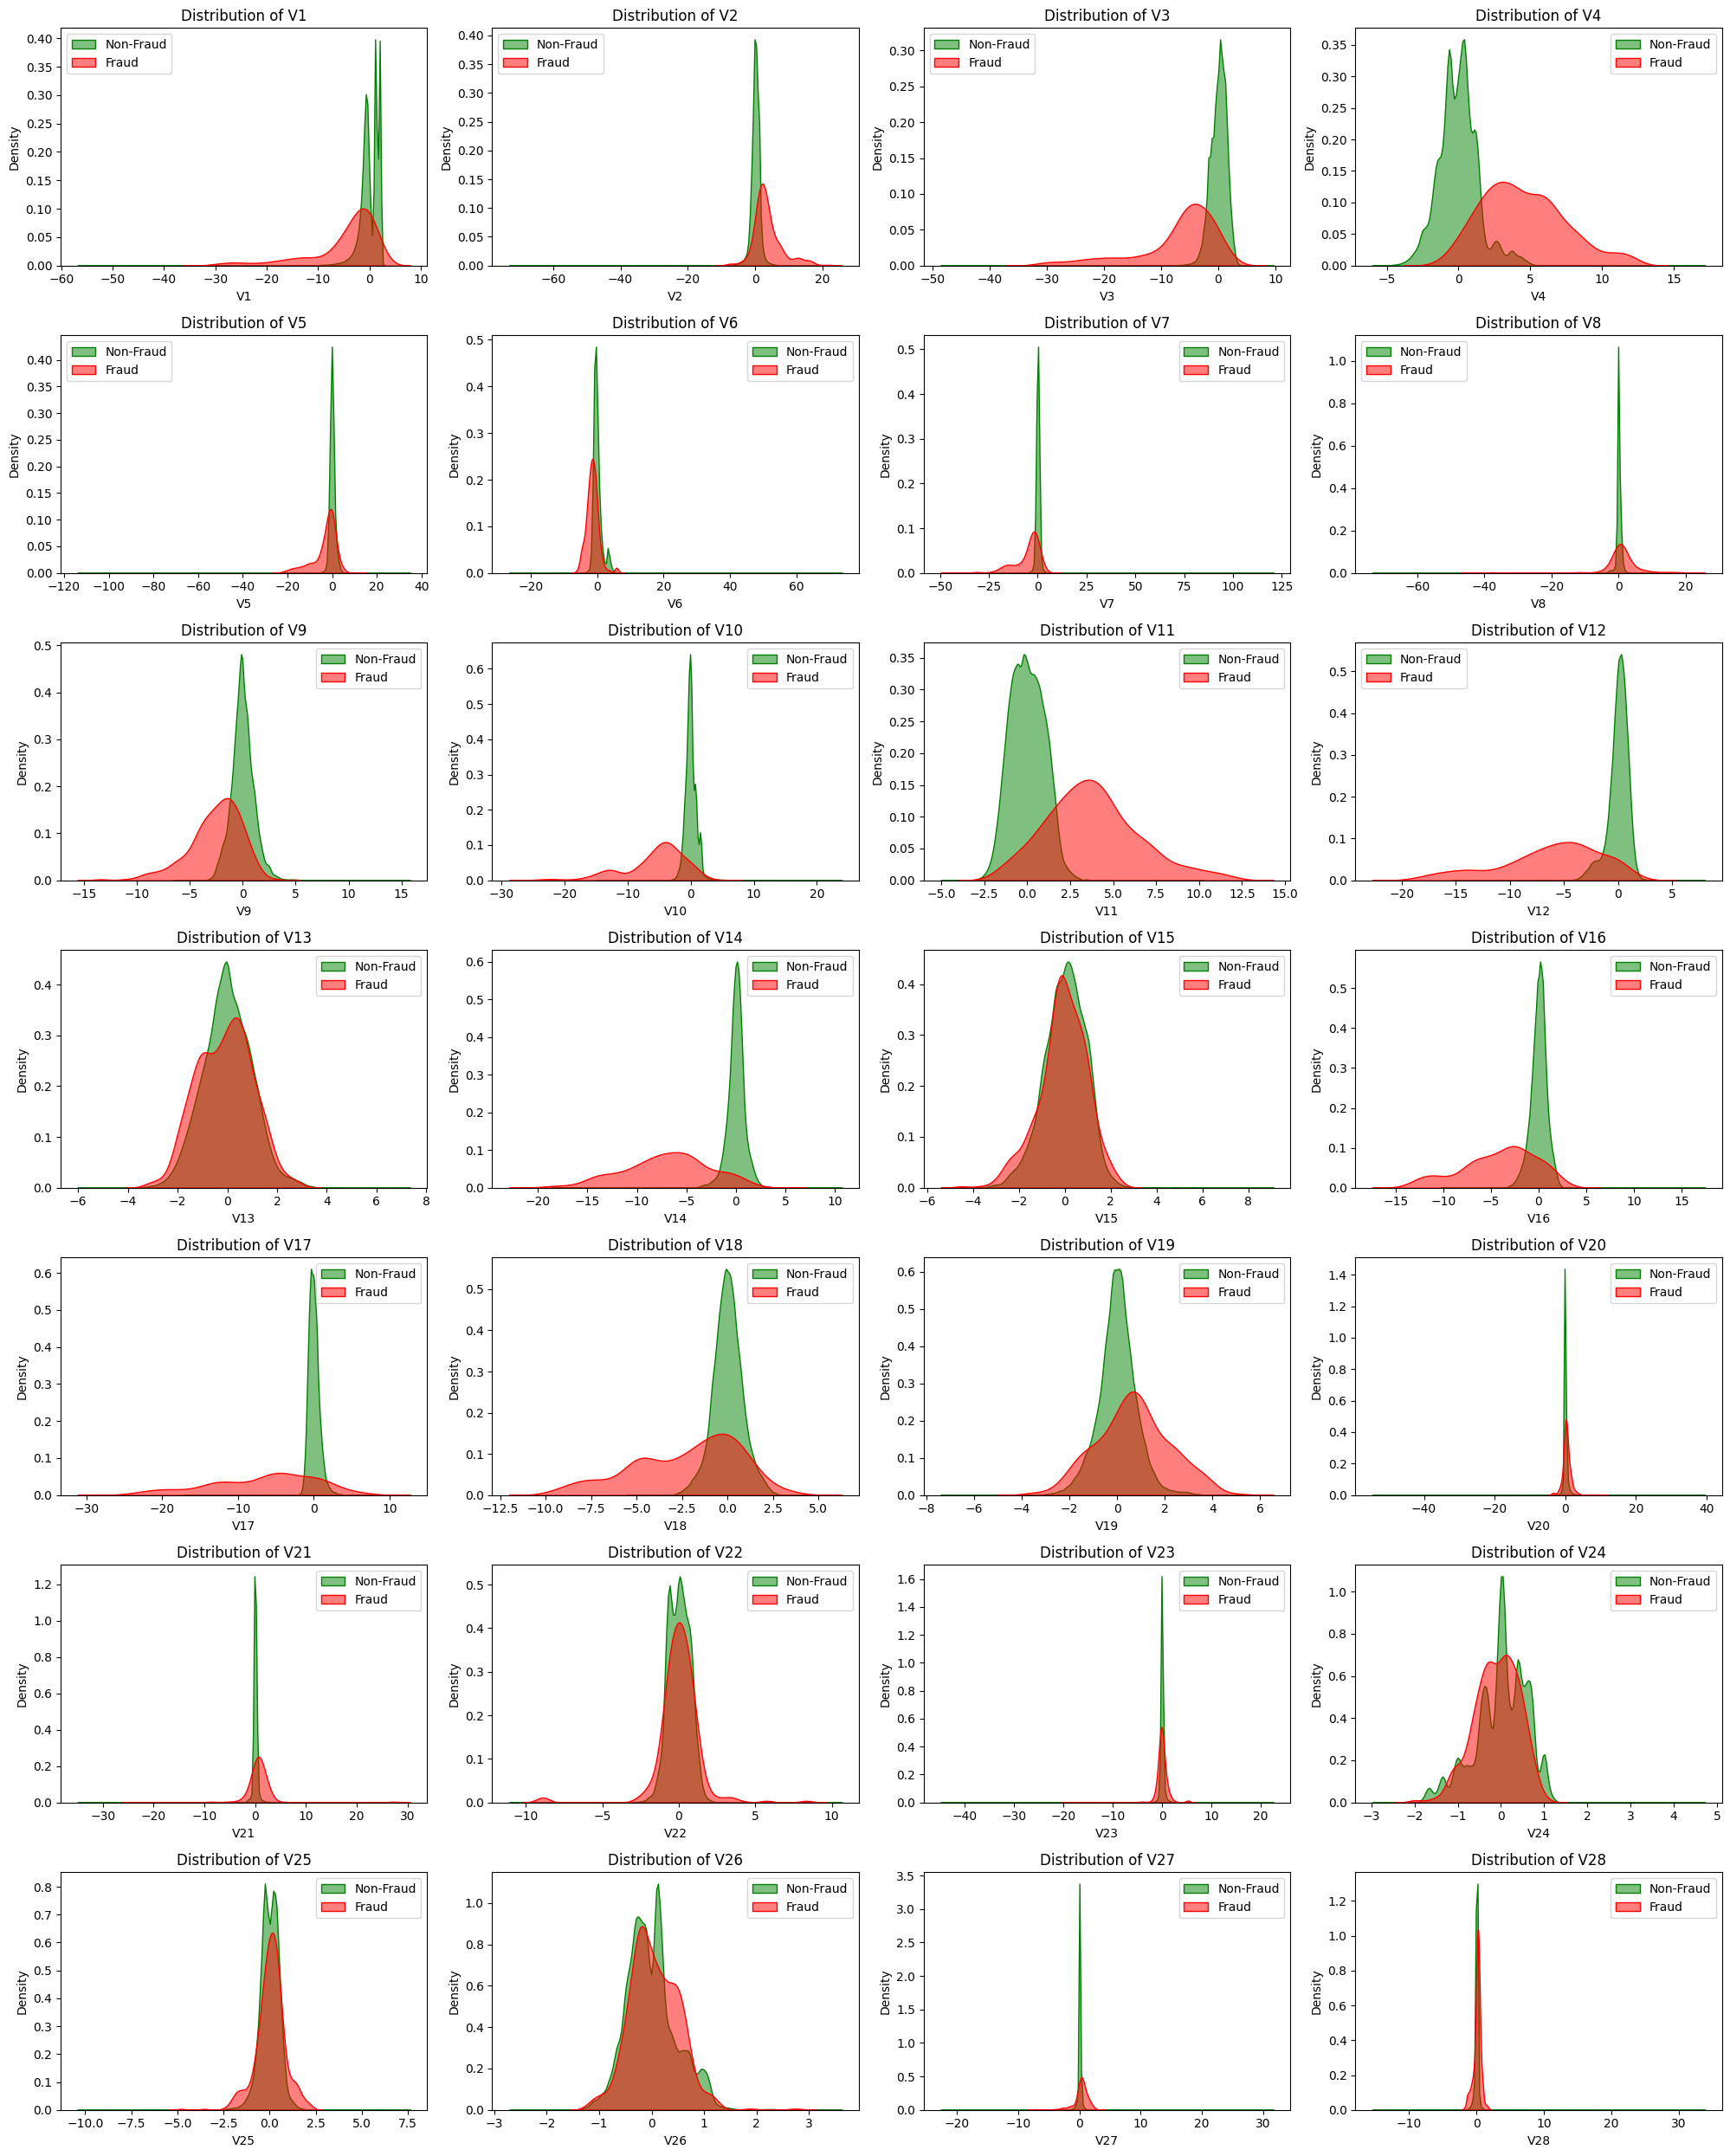

In [ ]:
pca_features = [f"V{i}" for i in range(1,29)]

plt.figure(figsize=(20, 25))
for i, col in enumerate(pca_features, 1):
    plt.subplot(7, 4, i)
    sns.kdeplot(df[df['Class']==0][col], label='Non-Fraud', color='green', fill=True, alpha=0.5)
    sns.kdeplot(df[df['Class']==1][col], label='Fraud', color='red', fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

**Insight:** Certain features have very different distributions for fraud vs non-fraud:

V4, V11, V12, V14, V17: frauds cluster far away from non-frauds.

Example: V14 values for fraud are mostly negative, while for non-frauds they’re more spread out.

👉 These PCA-transformed features are highly informative for detecting fraud.

**Key Insights (Summary)**

Frauds are extremely rare → need special handling (resampling, weighting).

Fraud amounts are smaller on average.

Frauds cluster in time (specific hours).

Certain features (V4, V14, V17, etc.) separate frauds strongly from non-frauds.

**Boxplots of Amount by Class and Violin Plot for Non-Fraud Amounts**

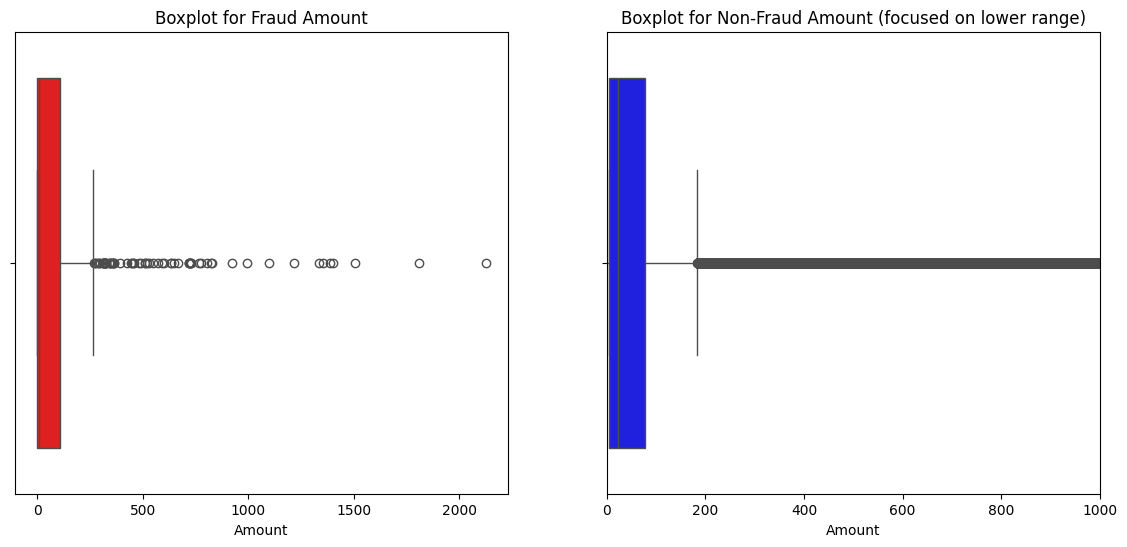

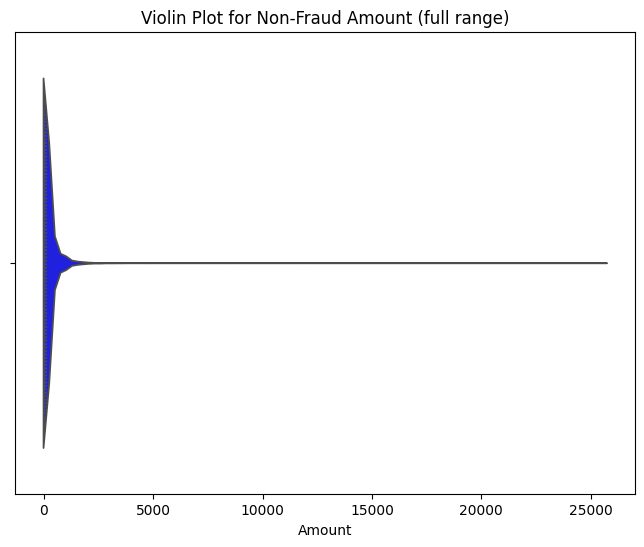

In [ ]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(14, 6))

# Boxplot for Fraud Amount
plt.subplot(121)
sns.boxplot(x=fraud['Amount'], color='red')
plt.title('Boxplot for Fraud Amount')

# Boxplot for Non-Fraud Amount (focused on lower range)
plt.subplot(122)
sns.boxplot(x=non_fraud['Amount'], color='blue')
plt.title('Boxplot for Non-Fraud Amount (focused on lower range)')
plt.xlim(0, 1000) # Set a limit on the x-axis to focus on the majority of transactions

# Optional: Add a violin plot to show the overall distribution of Non-Fraud Amount including outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=non_fraud['Amount'], color='blue', inner='quartile')
plt.title('Violin Plot for Non-Fraud Amount (full range)')
plt.show()

**Insights:**

The Boxplots show that fraudulent transactions generally involve smaller amounts compared to non-fraudulent ones, although both classes have outliers with larger transaction values. The non-fraudulent data is much more spread out, with a significant number of transactions occurring at much higher amounts than typical fraudulent transactions.

The Violin plot clearly illustrates the highly skewed distribution of non-fraudulent transaction amounts, with a massive concentration of transactions at very low values and a sparse distribution of much larger transactions.

**Histogram with Class Overlay**

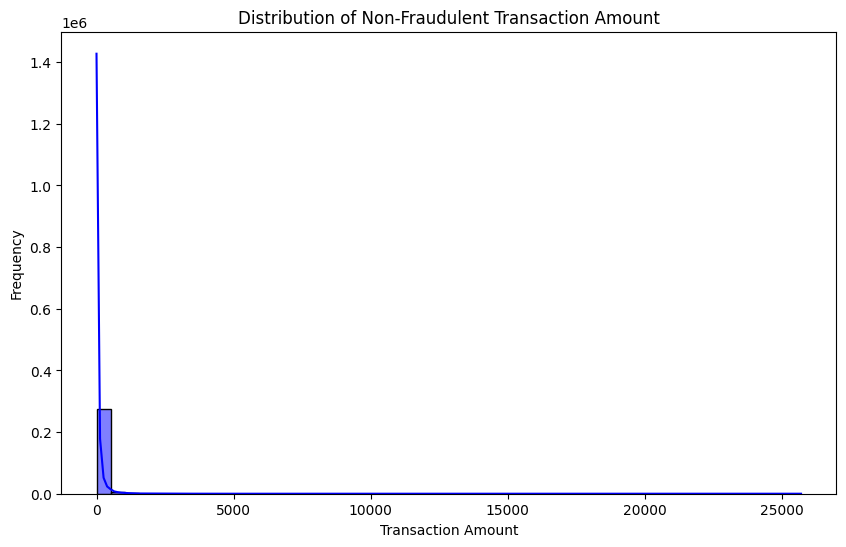

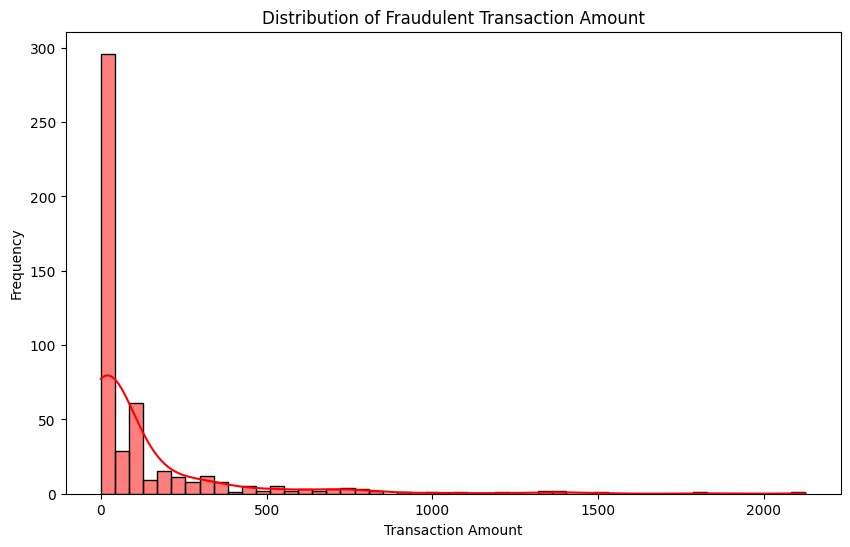

In [ ]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Histogram for Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=non_fraud, x='Amount', bins=50, kde=True, color='blue')
plt.title('Distribution of Non-Fraudulent Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram for Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud, x='Amount', bins=50, kde=True, color='red')
plt.title('Distribution of Fraudulent Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Insight:**

The histograms clearly illustrate that while both types of transactions occur at lower amounts, non-fraudulent transactions have a much higher frequency at the lowest values and a very long tail of larger transactions. Fraudulent transactions are also frequent at lower amounts but their distribution appears slightly more spread out across a range of smaller values compared to the extremely sharp peak of non-fraudulent transactions near zero. This visual comparison reinforces the idea that transaction amount is a distinguishing feature, with fraud being more likely at smaller values, although not exclusively.

**(Opt) Using groupby() to explore fraud by amount bins**

/tmp/ipython-input-820866382.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount_bin = df.groupby(['amount_bin', 'Class']).size().unstack(fill_value=0)


Class                    0    1   Total  Fraud Rate (%)
amount_bin                                             
(-0.001, 10.0]      100015  249  100264        0.248344
(10.0, 50.0]         90724   57   90781        0.062788
(50.0, 100.0]        37198   56   37254        0.150319
(100.0, 500.0]       47271   95   47366        0.200566
(500.0, 1000.0]       6176   26    6202        0.419220
(1000.0, 25691.16]    2931    9    2940        0.306122


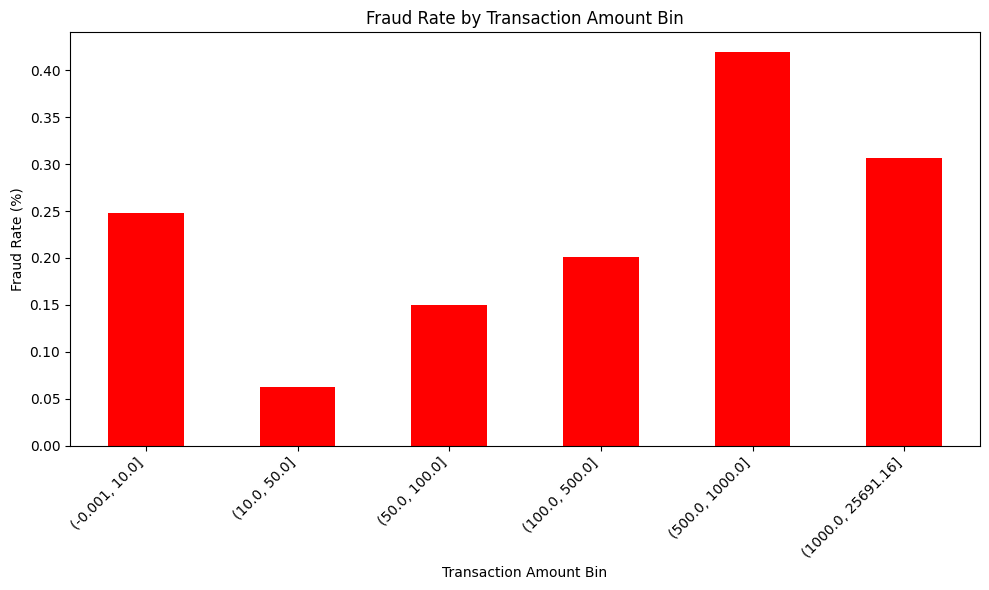

In [ ]:
# Create amount bins
# We can choose bin edges based on the distribution or specific thresholds
# Let's try a few bins to start
amount_bins = [0, 10, 50, 100, 500, 1000, df['Amount'].max()]
df['amount_bin'] = pd.cut(df['Amount'], bins=amount_bins, right=True, include_lowest=True)

# Group by amount bin and class to count transactions
fraud_by_amount_bin = df.groupby(['amount_bin', 'Class']).size().unstack(fill_value=0)

# Calculate total transactions per bin
fraud_by_amount_bin['Total'] = fraud_by_amount_bin[0] + fraud_by_amount_bin[1]

# Calculate fraud rate per bin
fraud_by_amount_bin['Fraud Rate (%)'] = (fraud_by_amount_bin[1] / fraud_by_amount_bin['Total']) * 100

# Display the results
print(fraud_by_amount_bin)

# Optional: Visualize the fraud rate by amount bin
plt.figure(figsize=(10, 6))
fraud_by_amount_bin['Fraud Rate (%)'].plot(kind='bar', color='red')
plt.title('Fraud Rate by Transaction Amount Bin')
plt.xlabel('Transaction Amount Bin')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:** From the output, we can observe how the fraud rate varies across different transaction amount ranges. It appears that the fraud rate is not uniform across all amount bins. For instance, the bins (500, 1000] and (1000, 25691.16] seem to have relatively higher fraud rates compared to some of the lower amount bins, although the bin (0, 10] also has a notable fraud rate.

**Correlation Heatmap**

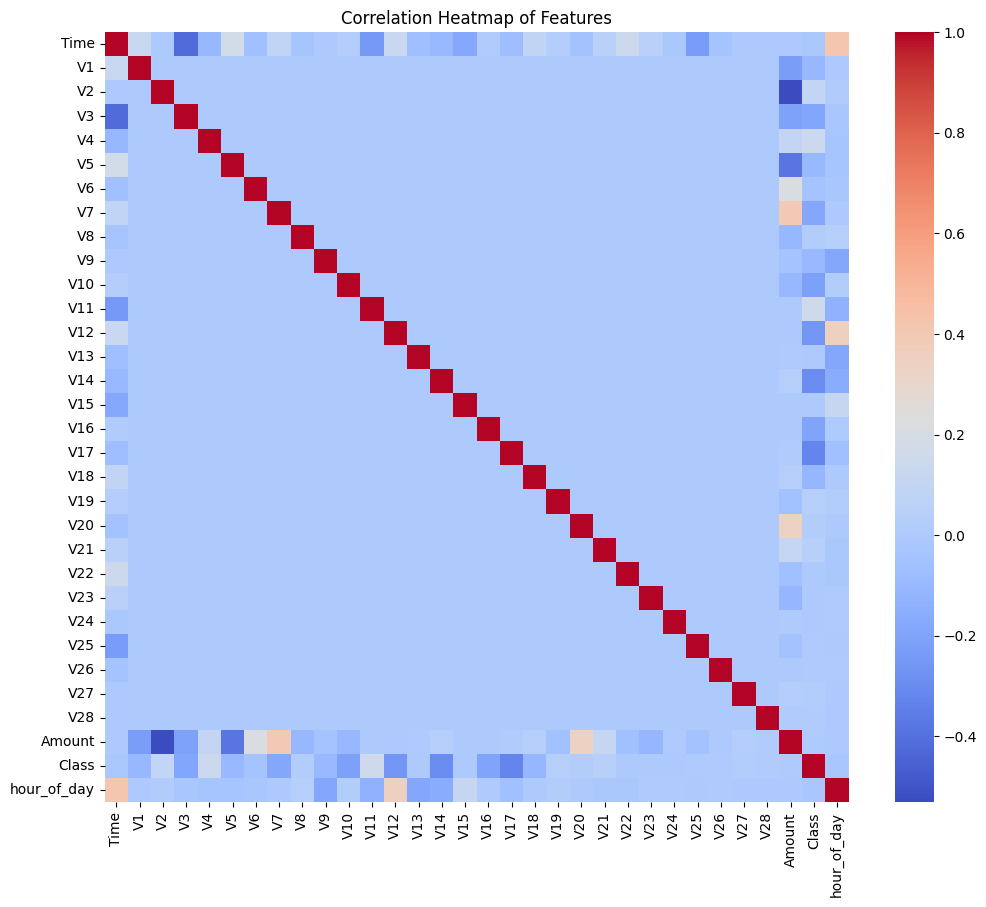

In [ ]:
# Calculate the correlation matrix
# Exclude non-numeric columns like 'amount_bin'
corr_matrix = df.drop('amount_bin', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

**Insight:** The heatmap highlights that certain PCA-transformed features (V variables) have the strongest linear relationships with the Class variable, making them potentially useful for distinguishing between fraudulent and non-fraudulent transactions. The low correlations among most of the V features suggest that they capture different aspects of the data. The Amount and Time features, while important, do not exhibit strong linear correlations with the Class variable in this dataset.

**(Opt) Creating a pairplot with Seaborn for high-correlation variables**

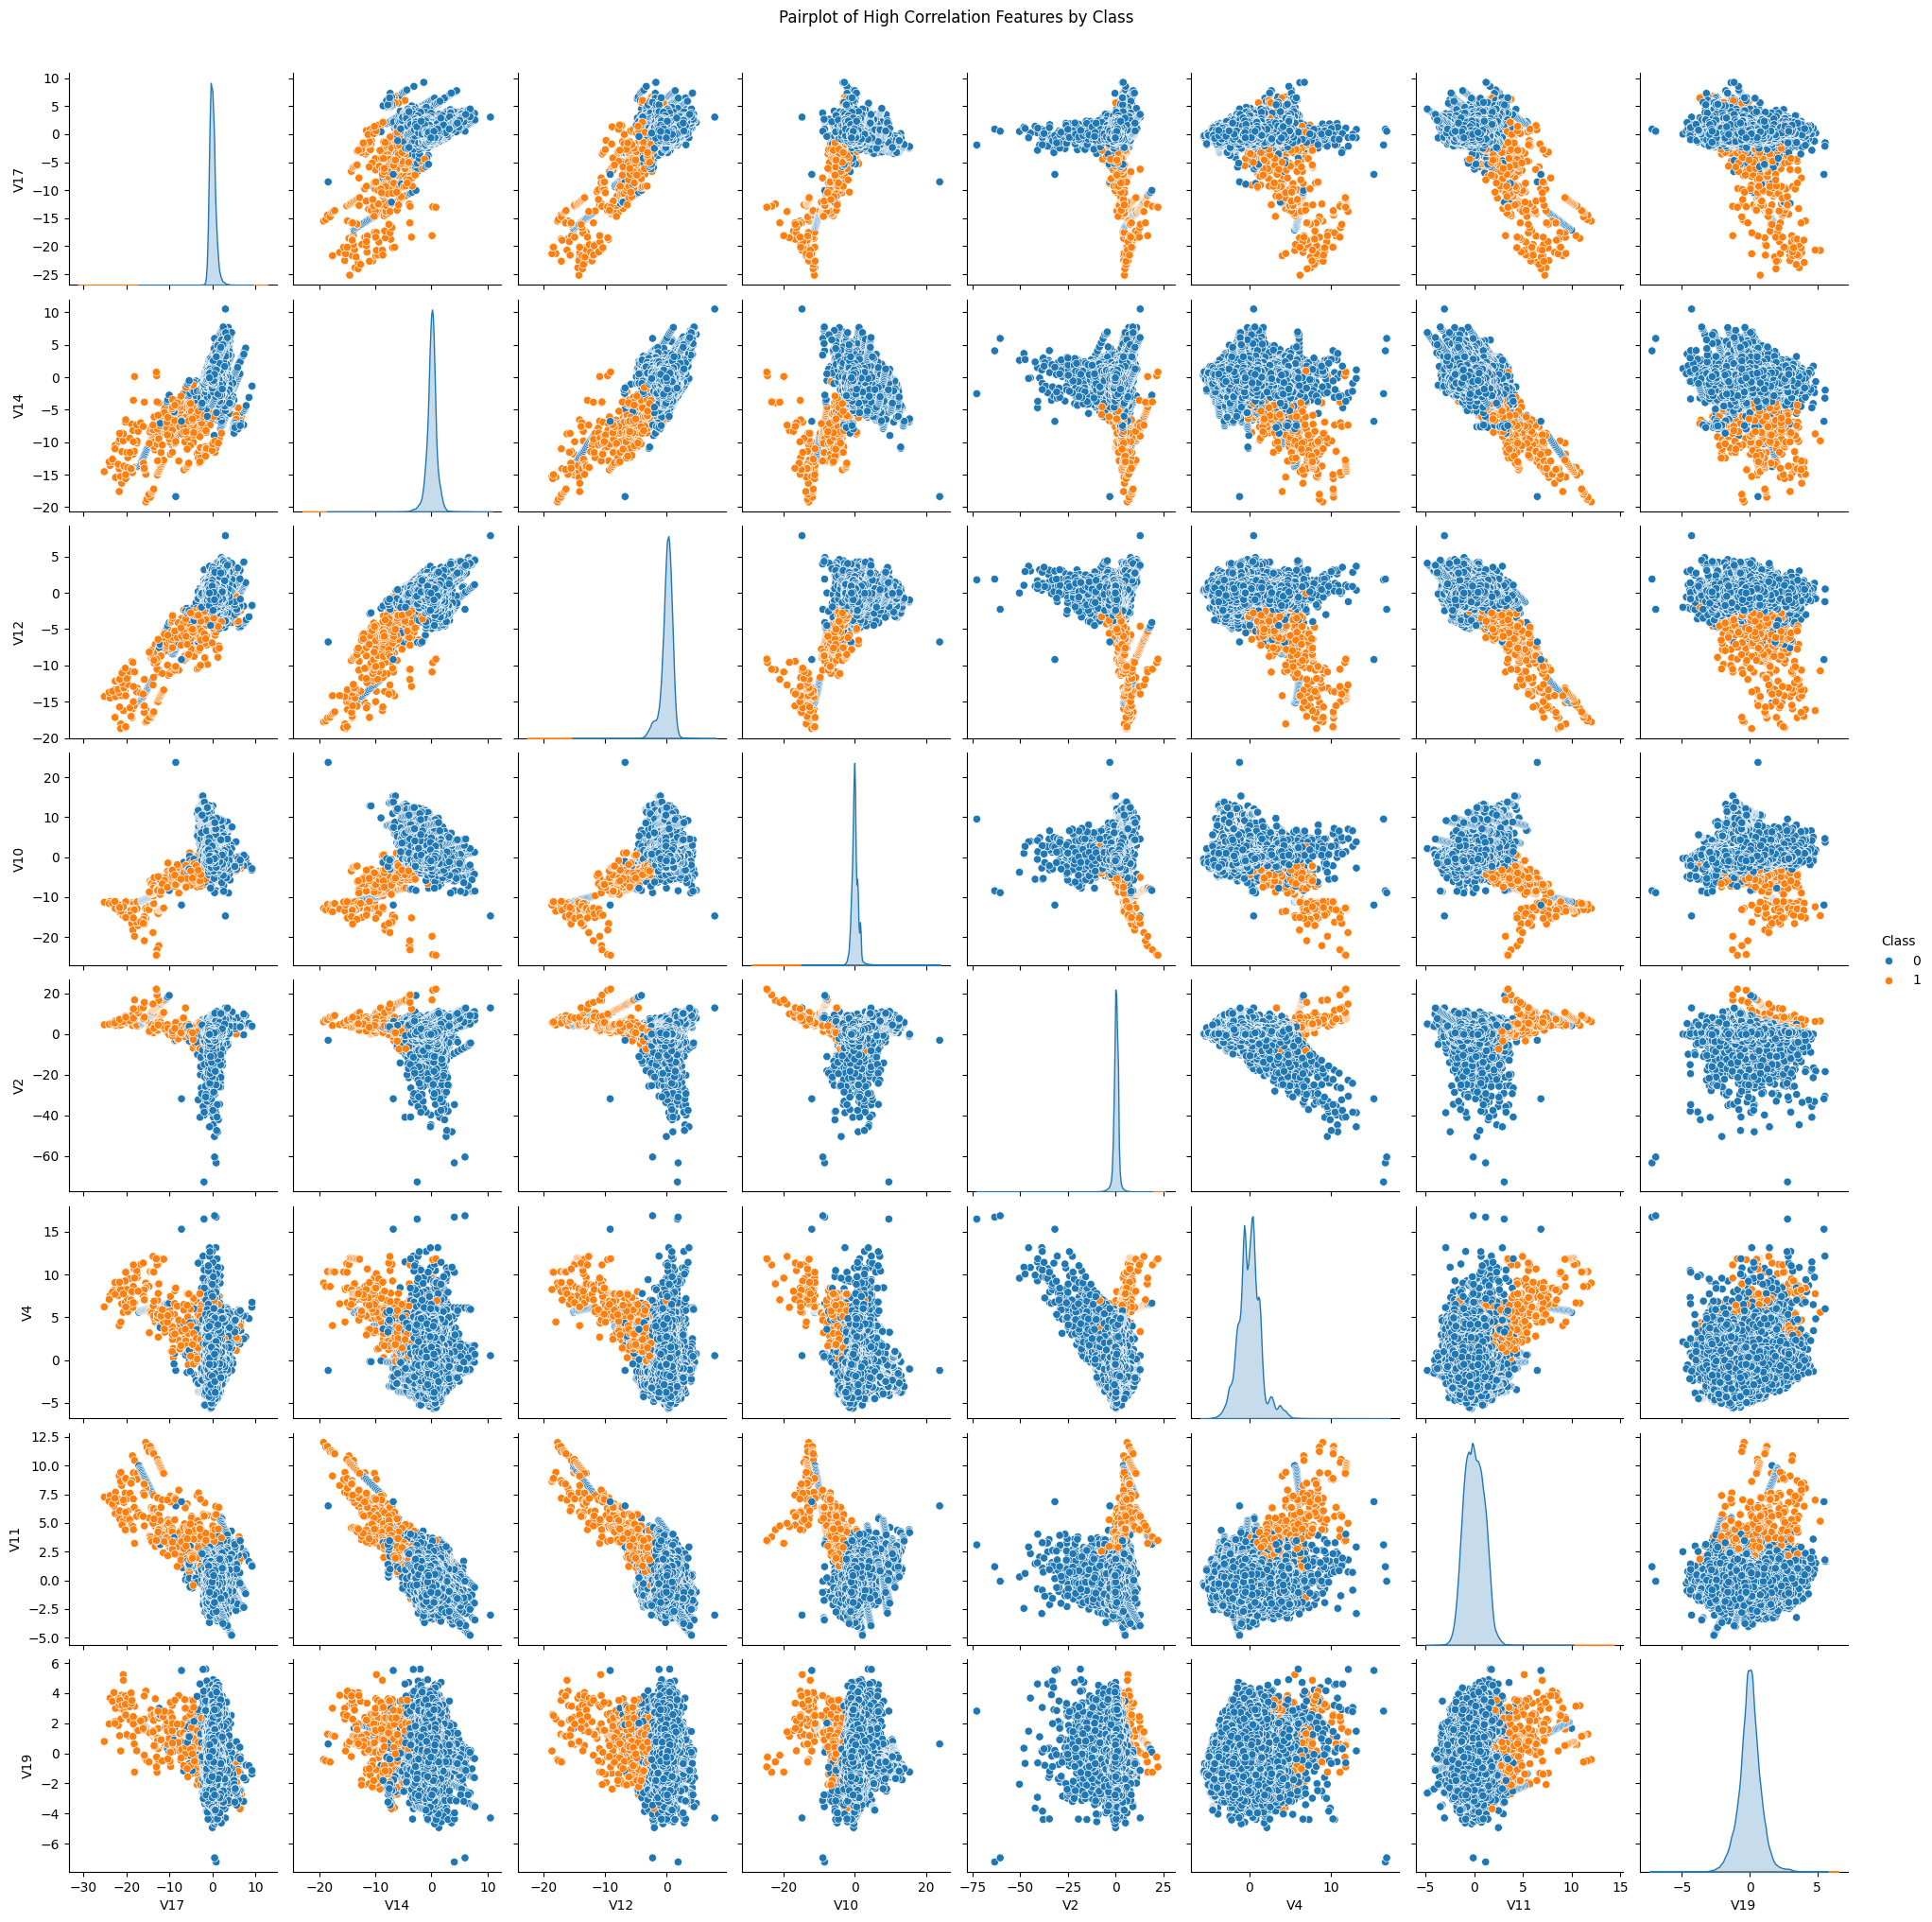

In [ ]:
# Select features with high correlation to Class
high_corr_features = ['V17', 'V14', 'V12', 'V10', 'V2', 'V4', 'V11', 'V19', 'Class']

# Create a pairplot
sns.pairplot(df[high_corr_features], hue='Class', diag_kind='kde')
plt.suptitle('Pairplot of High Correlation Features by Class', y=1.02)
plt.show()

**Insight:** The pairplot visually demonstrates that the selected high-correlation PCA features are effective at separating fraudulent from non-fraudulent transactions, both individually (in the density plots) and in combination (in the scatter plots). The distinct clustering and different distributions of the two classes in these plots confirm their importance for building a fraud detection model.

**(Opt) Using IQR for outlier detection on Amount**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Print the number of outliers and a sample of the outlier transactions
print(f"Number of transactions identified as outliers using IQR: {len(outliers)}")
print("\nSample of outlier transactions:")
display(outliers.head())

# Optionally, separate fraudulent outliers and non-fraudulent outliers
fraudulent_outliers = outliers[outliers['Class'] == 1]
non_fraudulent_outliers = outliers[outliers['Class'] == 0]

print(f"\nNumber of fraudulent outliers: {len(fraudulent_outliers)}")
print(f"Number of non-fraudulent outliers: {len(non_fraudulent_outliers)}")

# You can further analyze these outliers if needed

Number of transactions identified as outliers using IQR: 31904

Sample of outlier transactions:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour_of_day,amount_bin
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,"(100.0, 500.0]"
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0,0,"(100.0, 500.0]"
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,0,"(1000.0, 25691.16]"
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0,0,"(100.0, 500.0]"
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0,0,"(100.0, 500.0]"



Number of fraudulent outliers: 91
Number of non-fraudulent outliers: 31813


**Insight:**
This analysis confirms the presence of a significant number of transactions with amounts far from the typical range, particularly within the non-fraudulent class. While the IQR method highlights these extreme values, it's important to remember that not all outliers are necessarily fraudulent, and not all fraudulent transactions are outliers in terms of amount. This method helps in identifying transactions that might warrant further investigation due to their unusual magnitude.

**Overall Key Insights from Exploratory Data Analysis**

Based on the exploratory data analysis performed on the credit card fraud detection dataset, the following key insights were revealed:

**Severe Class Imbalance:** The dataset exhibits a significant imbalance between fraudulent and non-fraudulent transactions. Fraudulent transactions are extremely rare, constituting a very small percentage of the total transactions. This highlights the challenge of building models on such imbalanced data and the need for appropriate techniques (e.g., resampling, different evaluation metrics) in subsequent modeling steps.

**Transaction Amount Differences:** Analysis of the transaction 'Amount' revealed notable differences between the two classes. Fraudulent transactions tend to involve smaller amounts on average, with a lower median value compared to non-fraudulent transactions. While both classes have outliers with large transaction amounts, the distribution of non-fraudulent transactions is much more spread out with a higher frequency at the lowest values and a long tail of larger transactions.

**Temporal Patterns of Fraud:** The 'Time' feature, when analyzed by hour of day, showed that fraudulent transactions are not uniformly distributed throughout the 24-hour cycle. There are certain periods (e.g., late night/early morning) where the fraud rate appears to be higher, suggesting potential vulnerabilities during these times.

**Discriminative Power of PCA Features:** The correlation heatmap and pairplot demonstrated that several of the PCA-transformed features (V1-V28) have strong linear or distinct distributional relationships with the 'Class' variable. Features such as V4, V11, V12, V14, V17, and V19 appear to be particularly informative in separating fraudulent from non-fraudulent transactions.

**Outliers and Their Relationship to Fraud:** While outlier detection using the IQR method identified a significant number of transactions with extreme amounts, the majority of these outliers were non-fraudulent. This indicates that not all outliers are fraudulent, and conversely, many fraudulent transactions do not necessarily have outlier amounts. However, analyzing outliers can still provide valuable information about unusual transaction patterns.